In [1]:
"""
skcit-learn 패키지는 대부분은 머신러닝 알고리즘을 포함하고 있어 웹사이트에 예제와 정보를 참고할 수 있다.
웹사이트 : https://scikit-learn.org
""" 

'\nskcit-learn 패키지는 대부분은 머신러닝 알고리즘을 포함하고 있어 웹사이트에 예제와 정보를 참고할 수 있다.\n웹사이트 : https://scikit-learn.org\n'

### STEP 1. PCA 를 위한 데이터 파악 및 전처리

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA

In [6]:
# iris 데이터를 불러오기, 구조를  살핌
iris = datasets.load_iris()
dir(iris) # 어떤 attribute를 가지고 있는지 확인

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [14]:
# 독립변수 중 첫번째와 세번째 컬럼의 변수만 사용
X = iris.data[:,[0,2]]
y = iris.target

In [21]:
print(X.shape)
feature_names=[iris.feature_names[0], iris.feature_names[2]]

df_X = pd.DataFrame(X)
df_X.head()

(150, 2)


,0,1
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [24]:
print(y.shape)
df_Y = pd.DataFrame(y)
df_Y.head()

(150,)


,0
0,0
1,0
2,0
3,0
4,0


- 결측치(null) 여부 파악

In [27]:
print(df_X.isnull().sum())
print(df_Y.isnull().sum())

0    0
1    0
dtype: int64
0    0
dtype: int64


In [29]:
# 종속변수의 범주를 확인
print(set(y))
print(iris.target_names)

{0, 1, 2}
['setosa' 'versicolor' 'virginica']


- 종속변수의 분포 확인

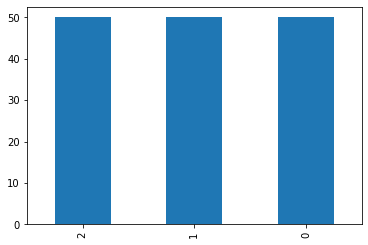

In [30]:
df_Y[0].value_counts().plot(kind='bar')
plt.show()

- 독립변수의 분포 확인

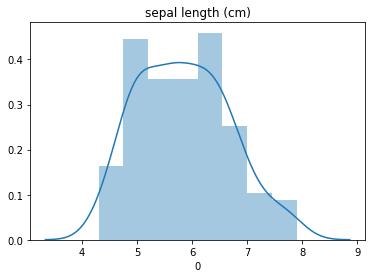

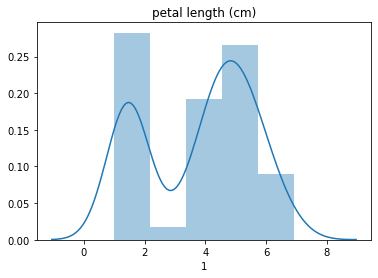

In [31]:
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

### STEP 2. PCA 적용 및 결과 해석

- PCA 함수를 활용해서 PC 값 추출

In [33]:
pca = PCA(n_components=2) # 2개의 주성분만 추출
pca.fit(X)

PCA(n_components=2)

- PC score를 이용해서 회귀분석에 활용

In [37]:
# eigen value를 확인
print(pca.explained_variance_)

PCscore = pca.transform(X)
PCscore[0:5]

[3.66189877 0.1400726 ]


array([[-2.46024094, -0.24479165],
       [-2.53896211, -0.06093579],
       [-2.70961121,  0.08355948],
       [-2.56511594,  0.25420858],
       [-2.49960153, -0.15286372]])

In [42]:
# eigen vector를 확인
eigens_v = pca.components_.transpose() # 매트릭스 행렬곱을 위한 행렬전치 수행
print(eigens_v)

[[ 0.39360585 -0.9192793 ]
 [ 0.9192793   0.39360585]]


In [44]:
mX = np.matrix(X)
for i in range(X.shape[1]):
    mX[:,i]=mX[:,i]-np.mean(X[:,i]) # centering 수행
dfmX = pd.DataFrame(mX)
dfmX.head()

,0,1
0,-0.743333,-2.358
1,-0.943333,-2.358
2,-1.143333,-2.458
3,-1.243333,-2.258
4,-0.843333,-2.358


In [46]:
(mX*eigens_v)[0:5] # 데이터와 해당데이터의 eigen vector의 내적이 PC score와 동일한지 확인!

matrix([[-2.46024094, -0.24479165],
        [-2.53896211, -0.06093579],
        [-2.70961121,  0.08355948],
        [-2.56511594,  0.25420858],
        [-2.49960153, -0.15286372]])

- 주성분(PC) 축으로 사영시킨 데이터의 시각화

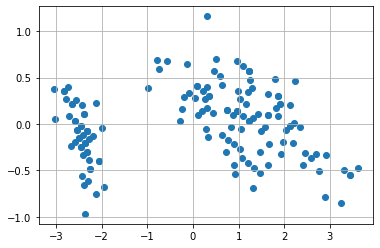

In [90]:
plt.scatter(PCscore[:,0], PCscore[:,1])
plt.grid()
plt.show()

- 기존 X, Y 축에서 데이터 및 PC축 시각화

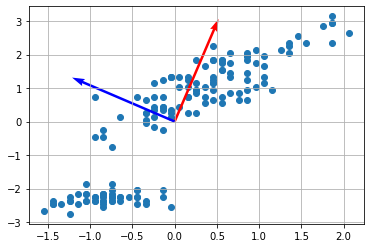

In [98]:
plt.scatter(dfmX[0], dfmX[1])
origin = [0, 0], [0, 0] # origin point
plt.quiver(*origin, eigens_v[0,:], eigens_v[1,:], color=['r','b'], scale=3)
plt.grid()
plt.show()

In [99]:
"""
위 그래프는 첫번째 주성분(빨간색 화살표), 두번째 주성분(파란색 화살표)을 나타내며,
첫번째 주성분은 사영시키고자 하는 데이터의 분산이 가장 큰 축을 의미하고, 두번째 주성분은 
그와 직교(orthogonal)할 수 있는 축 가운데, 데이터의 분산이 가장 작은 축을 의미함을 알 수 있다.
"""

'\n위 그래프는 첫번째 주성분(빨간색 화살표), 두번째 주성분(파란색 화살표)을 나타내며,\n첫번째 주성분은 사영시키고자 하는 데이터의 분산이 가장 큰 축을 의미하고, 두번째 주성분은 \n그와 직교(orthogonal)할 수 있는 축 가운데, 데이터의 분산이 가장 작은 축을 의미함을 알 수 있다.\n'

### STEP 3. 주성분(PC)를 활용한 회귀분석

In [100]:
X2 = iris.data
pca2 = PCA(n_components=4)
pca2.fit(X2)

PCA(n_components=4)

In [102]:
# eigen value 확인
pca2.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [104]:
PCscore=pca2.transform(X2)[:,0:2] # 2개의 주성분 추출

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

- 모델 복잡성으로 인하여 기존 자료를 이용한 분석은 수렴하지 않는 모습

In [110]:
# 3개의 라벨이 있기 때문에 multi_class 인자값을 설정해줘야함
clf = LogisticRegression(solver="sag", multi_class="multinomial").fit(X2, y)
# 회귀계수값이 수렴하지않는다는 오류가 뜸

c:\anaconda3\envs\fastcampus_ml\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


- 추출한 2개의 주성분을 이용하여 분석한 경우 모델이 수렴함

In [114]:
clf = LogisticRegression(solver="sag", multi_class="multinomial").fit(PCscore, y)

In [118]:
# 모델성능평가
confusion_matrix(y, clf.predict(PCscore))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

- 임의로 변수 2개를 뽑아 분석한 경우 모델의 성능이 하락함

In [120]:
# 기존데이터 X의 독립변수 개수를 감소시켜서 회귀분석 수행
clf = LogisticRegression(solver="sag", max_iter=1000, random_state=0, multi_class="multinomial").fit(X2[:,0:2], y)

In [121]:
confusion_matrix(y, clf.predict(X2[:,0:2]))

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]], dtype=int64)

In [123]:
"""
위의 경우에선, 주성분 추출 후 회귀분석한 모델의 성능이 기존데이터를 기반으로 한 회귀모델의 성능보다 좋다.
단, 데이터도메인을 이해하고 각 독립변수와 출력변수가 갖는 의미해석이 선행되어야하며, 
모든 경우에 대해서 주성분 분석이 효과적이라고는 볼수없다. 
"""

'\n위의 경우에선, 주성분 추출 후 회귀분석한 모델의 성능이 기존데이터를 기반으로 한 회귀모델의 성능보다 좋다.\n단, 데이터도메인을 이해하고 각 독립변수와 출력변수가 갖는 의미해석이 선행되어야하며, \n모든 경우에 대해서 주성분 분석이 효과적이라고는 볼수없다. \n'